In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    """Compute the Euclidean distance between two data points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
# Compute the accuracy
accuracy = np.mean(y_pred == y_test)

accuracy

1.0

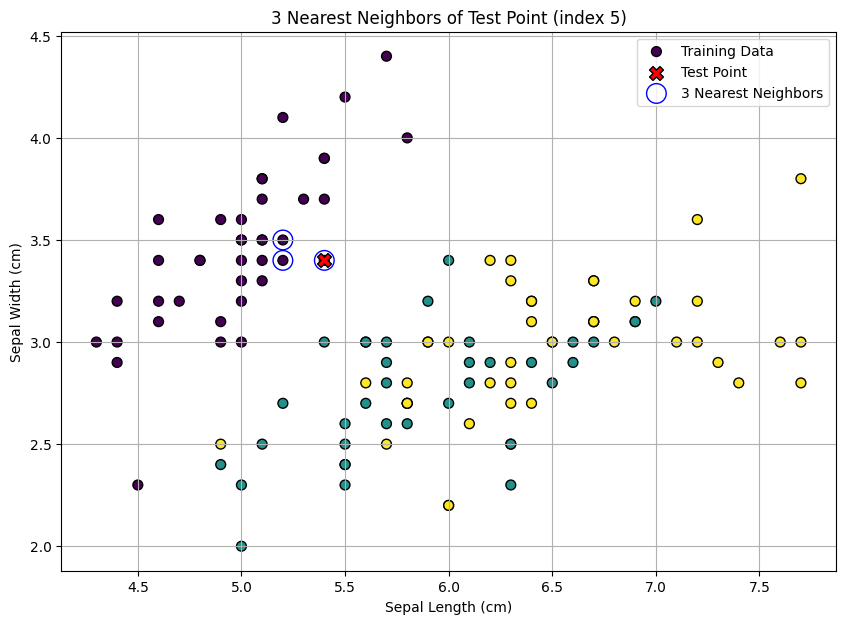

In [ ]:
def find_nearest_neighbors(X_train, test_point, k=3):
    """Find the k nearest neighbors of a given test point."""
    distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    return X_train[k_indices]

def plot_with_neighbors(X_train, X_test, y_train, y_test, test_index, k=3):
    plt.figure(figsize=(10, 7))
    # Plot training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, label='Training Data')
    # Highlight the test point
    plt.scatter(X_test[test_index, 0], X_test[test_index, 1], color='red', s=100, edgecolor='k', marker='X', label='Test Point')
    # Find and plot the k nearest neighbors
    neighbors = find_nearest_neighbors(X_train, X_test[test_index], k)
    plt.scatter(neighbors[:, 0], neighbors[:, 1], color='none', s=200, edgecolor='blue', label=f'{k} Nearest Neighbors')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'{k} Nearest Neighbors of Test Point (index {test_index})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Select a random test point (for demonstration, we'll choose index 5)
test_index = 5
plot_with_neighbors(X_train, X_test, y_train, y_test, test_index, k=3)